In [3]:
import pandas as pd

df=pd.read_csv("hotel_bookings.csv")


In [4]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,01-07-15
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,01-07-15
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,02-07-15
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,02-07-15
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,03-07-15


In [5]:
df.isna().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [7]:
# Handle missing values
df['children'].fillna(0, inplace=True)  # Assume missing children values as 0
df['country'].fillna('Unknown', inplace=True)  # Replace missing country with 'Unknown'
df['agent'].fillna(0, inplace=True)  # Replace missing agent IDs with 0
df['company'].fillna(0, inplace=True)  # Replace missing company IDs with 0

# Convert reservation_status_date to datetime format
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'], format='%d-%m-%y')

# Create total_nights column
df['total_nights'] = df['stays_in_weekend_nights'] + df['stays_in_week_nights']

# Compute total revenue per booking
df['total_revenue'] = df['adr'] * df['total_nights']

# Verify changes
df[['children', 'country', 'agent', 'company', 'reservation_status_date', 'total_nights', 'total_revenue']].head()


/var/folders/yb/jsqpw7c55pv0wphr0j5_0b8h0000gn/T/ipykernel_47749/1302050890.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['children'].fillna(0, inplace=True)  # Assume missing children values as 0
/var/folders/yb/jsqpw7c55pv0wphr0j5_0b8h0000gn/T/ipykernel_47749/1302050890.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on whi

,children,country,agent,company,reservation_status_date,total_nights,total_revenue
0,0.0,PRT,0.0,0.0,2015-07-01,0,0.0
1,0.0,PRT,0.0,0.0,2015-07-01,0,0.0
2,0.0,GBR,0.0,0.0,2015-07-02,1,75.0
3,0.0,GBR,304.0,0.0,2015-07-02,1,75.0
4,0.0,GBR,240.0,0.0,2015-07-03,2,196.0


In [8]:
df.isna().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

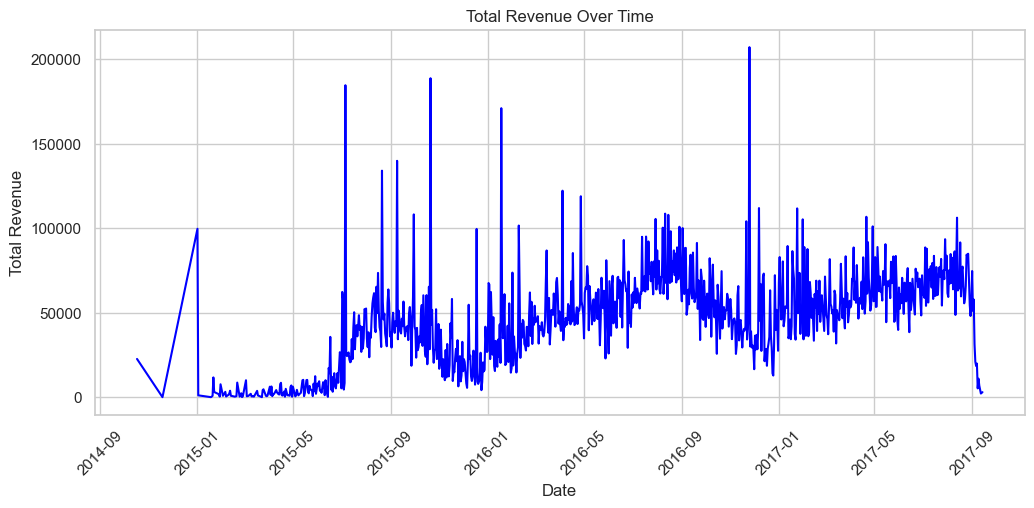

/var/folders/yb/jsqpw7c55pv0wphr0j5_0b8h0000gn/T/ipykernel_47749/686703788.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.index, y=top_countries.values, palette='viridis')


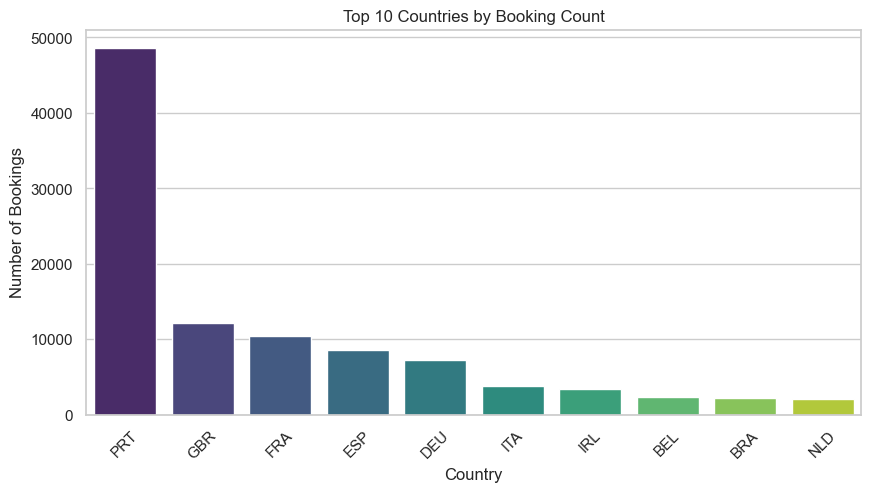

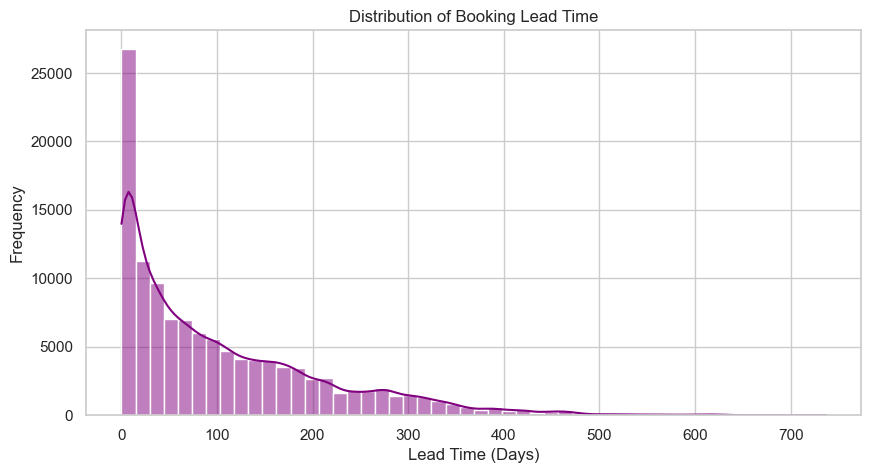

37.041628277075134

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set_theme(style="whitegrid")

# 1. Revenue Trends Over Time
df_revenue = df.groupby('reservation_status_date')['total_revenue'].sum().reset_index()

plt.figure(figsize=(12, 5))
sns.lineplot(x='reservation_status_date', y='total_revenue', data=df_revenue, color='blue')
plt.title('Total Revenue Over Time')
plt.xlabel('Date')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.show()

# 2. Cancellation Rate
cancellation_rate = df['is_canceled'].mean() * 100

# 3. Geographical Distribution of Bookings
top_countries = df['country'].value_counts().head(10)

plt.figure(figsize=(10, 5))
sns.barplot(x=top_countries.index, y=top_countries.values, palette='viridis')
plt.title('Top 10 Countries by Booking Count')
plt.xlabel('Country')
plt.ylabel('Number of Bookings')
plt.xticks(rotation=45)
plt.show()

# 4. Booking Lead Time Distribution
plt.figure(figsize=(10, 5))
sns.histplot(df['lead_time'], bins=50, kde=True, color='purple')
plt.title('Distribution of Booking Lead Time')
plt.xlabel('Lead Time (Days)')
plt.ylabel('Frequency')
plt.show()

# Output cancellation rate
cancellation_rate

In [10]:
print(df.columns)

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'total_nights',
       'total_revenue'],
      dtype='object')


In [11]:
import pandas as pd
from sentence_transformers import SentenceTransformer

text_columns = [col for col in df.columns if df[col].dtype == 'object']

if not text_columns:
    raise ValueError("No text column found in the DataFrame!")

TEXT_COLUMN = text_columns[0]
print(f"Using detected text column: {TEXT_COLUMN}")

df[TEXT_COLUMN] = df[TEXT_COLUMN].fillna("").astype(str)

embedding_model = SentenceTransformer("all-MiniLM-L6-v2")

embeddings = embedding_model.encode(df[TEXT_COLUMN].tolist(), convert_to_numpy=True)

df["embeddings"] = list(embeddings)

print(df[[TEXT_COLUMN, "embeddings"]].head())


/Users/govindkumar/Downloads/sed_example/analyst-env/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Using detected text column: hotel
          hotel                                         embeddings
0  Resort Hotel  [0.076133534, 0.039062306, -0.08670585, 0.0695...
1  Resort Hotel  [0.076133534, 0.039062306, -0.08670585, 0.0695...
2  Resort Hotel  [0.076133534, 0.039062306, -0.08670585, 0.0695...
3  Resort Hotel  [0.076133534, 0.039062306, -0.08670585, 0.0695...
4  Resort Hotel  [0.076133534, 0.039062306, -0.08670585, 0.0695...


In [12]:
from sentence_transformers import SentenceTransformer

# Load the embedding model
embedding_model = SentenceTransformer("all-MiniLM-L6-v2")  

# Now encode the text
embeddings = embedding_model.encode(TEXT_COLUMN, convert_to_numpy=True)


In [13]:
import chromadb

chroma_client = chromadb.PersistentClient(path="new_chrome_db/")

collection = chroma_client.get_or_create_collection(name="hotel_bookings")

metadata_records = df[['hotel', 'arrival_date_year', 'arrival_date_month', 'total_nights', 
                       'total_revenue', 'country', 'is_canceled']].astype(str)

text_data = metadata_records.apply(lambda x: ' | '.join(x), axis=1).tolist()

embeddings = embedding_model.encode(text_data, convert_to_numpy=True)

for i, (text, emb) in enumerate(zip(text_data, embeddings)):
    collection.add(
        ids=[str(i)],
        embeddings=[emb.tolist()],
        metadatas=[{"text": text}]
    )

collection.count()

In [ ]:
df['search_text'] = df[['hotel', 'arrival_date_year', 'arrival_date_month', 'total_nights', 
                        'total_revenue', 'country', 'is_canceled']].astype(str).agg(' | '.join, axis=1)

def search_booking_data(query, df, top_n=5):
    """Simple keyword-based search to filter relevant booking records."""
    filtered_df = df[df['search_text'].str.contains(query, case=False, na=False)]
    return filtered_df.head(top_n)

search_booking_data("2017 | PRT", df)  # Example: Search for bookings in Portugal in 2017


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,total_nights,total_revenue,embeddings,search_text
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,0,0.0,"[0.076133534, 0.039062306, -0.08670585, 0.0695...",Resort Hotel | 2015 | July | 0 | 0.0 | PRT | 0
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,0,0.0,"[0.076133534, 0.039062306, -0.08670585, 0.0695...",Resort Hotel | 2015 | July | 0 | 0.0 | PRT | 0
6,Resort Hotel,0,0,2015,July,27,1,0,2,2,...,Transient,107.0,0,0,Check-Out,2015-07-03,2,214.0,"[0.076133534, 0.039062306, -0.08670585, 0.0695...",Resort Hotel | 2015 | July | 2 | 214.0 | PRT | 0
7,Resort Hotel,0,9,2015,July,27,1,0,2,2,...,Transient,103.0,0,1,Check-Out,2015-07-03,2,206.0,"[0.076133534, 0.039062306, -0.08670585, 0.0695...",Resort Hotel | 2015 | July | 2 | 206.0 | PRT | 0
8,Resort Hotel,1,85,2015,July,27,1,0,3,2,...,Transient,82.0,0,1,Canceled,2015-05-06,3,246.0,"[0.076133534, 0.039062306, -0.08670585, 0.0695...",Resort Hotel | 2015 | July | 3 | 246.0 | PRT | 1


In [ ]:
from transformers import pipeline

qa_pipeline = pipeline("text-generation", model="EleutherAI/gpt-neo-125M")

def generate_answer(query):
    response = qa_pipeline(f"Answer this question based on booking data: {query}", max_length=50)
    return response[0]["generated_text"]


generate_answer("What is the average price of a hotel booking?")


Device set to use cpu
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


'Answer this question based on booking data: What is the average price of a hotel booking?\n\nI have a question about the average price of a hotel booking. I have a booking data set that shows the average price of a hotel booking. I'

In [ ]:
import calendar

def answer_query(query):
    query = query.lower()

    year = None
    month = None
    for y in df['arrival_date_year'].astype(str).unique():
        if y in query:
            year = y
            break

    for m in df['arrival_date_month'].unique():
        if m.lower() in query:
            month = m
            break

    if "total revenue" in query and month and year:
        filtered_df = df[(df['arrival_date_month'] == month) & (df['arrival_date_year'].astype(str) == year)]
        total_revenue = filtered_df['total_revenue'].sum()
        return f"Total revenue for {month} {year} is {total_revenue:.2f}."

    if "highest booking cancellations" in query:
        top_countries = df[df['is_canceled'] == 1]['country'].value_counts().head(3)
        return f"Top locations with the highest cancellations: {', '.join(top_countries.index)}."

    if "average price" in query:
        avg_price = df['adr'].mean()
        return f"The average price of a hotel booking is {avg_price:.2f} per night."

    return "I couldn't find a relevant answer. Please rephrase your question."

answer_query("Show me total revenue for July 2017.")


'Total revenue for July 2017 is 3132959.07.'

In [2]:
from flask import Flask, request, jsonify

app = Flask(__name__)

@app.route('/analytics', methods=['POST'])
def get_analytics():
    analytics = {
        "cancellation_rate": df['is_canceled'].mean() * 100,
        "average_price": df['adr'].mean()
    }
    return jsonify(analytics)

@app.route('/ask', methods=['POST'])
def ask_question():
    data = request.get_json()
    query = data.get("query", "")
    response = answer_query(query)
    return jsonify({"answer": response})


app.run()


 * Serving Flask app '__main__'
 * Debug mode: off


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
